**Modules**

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**Import data**

In [2]:
items = pd.read_parquet('../Processed/books_SE_v5.parquet')

In [3]:
items.shape

(2113033, 20)

In [4]:
items.head()

,isbn,country_code,language_code,average_rating,description,link,publisher,num_pages,publication_day,isbn13,publication_month,publication_year,url,image_url,book_id,ratings_count,title,title_without_series,mod_title,mod_title_without_series
0,0312853122,US,,4.00,,https://www.goodreads.com/book/show/5333265-w-...,St. Martin's Press,256,1,9780312853129,9,1984,https://www.goodreads.com/book/show/5333265-w-...,https://images.gr-assets.com/books/1310220028m...,5333265,3,W.C. Fields: A Life on Film,W.C. Fields: A Life on Film,wc fields a life on film,wc fields a life on film
1,0743509986,US,,3.23,"Anita Diamant's international bestseller ""The ...",https://www.goodreads.com/book/show/1333909.Go...,Simon & Schuster Audio,0,1,9780743509985,10,2001,https://www.goodreads.com/book/show/1333909.Go...,https://s.gr-assets.com/assets/nophoto/book/11...,1333909,10,Good Harbor,Good Harbor,good harbor,good harbor
2,,US,eng,4.03,Omnibus book club edition containing the Ladie...,https://www.goodreads.com/book/show/7327624-th...,"Nelson Doubleday, Inc.",600,0,,0,1987,https://www.goodreads.com/book/show/7327624-th...,https://images.gr-assets.com/books/1304100136m...,7327624,140,"The Unschooled Wizard (Sun Wolf and Starhawk, ...","The Unschooled Wizard (Sun Wolf and Starhawk, ...",the unschooled wizard sun wolf and starhawk 12,the unschooled wizard sun wolf and starhawk 12
3,0743294297,US,eng,3.49,Addie Downs and Valerie Adler were eight when ...,https://www.goodreads.com/book/show/6066819-be...,Atria Books,368,14,9780743294294,7,2009,https://www.goodreads.com/book/show/6066819-be...,https://s.gr-assets.com/assets/nophoto/book/11...,6066819,51184,Best Friends Forever,Best Friends Forever,best friends forever,best friends forever
4,0850308712,US,,3.40,,https://www.goodreads.com/book/show/287140.Run...,,0,0,9780850308716,0,0,https://www.goodreads.com/book/show/287140.Run...,https://images.gr-assets.com/books/1413219371m...,287140,15,Runic Astrology: Starcraft and Timekeeping in ...,Runic Astrology: Starcraft and Timekeeping in ...,runic astrology starcraft and timekeeping in t...,runic astrology starcraft and timekeeping in t...


In [5]:
items[["ratings_count","average_rating"]].isnull().mean()*100

ratings_count     0.0
average_rating    0.0
dtype: float64

In [7]:
items[["ratings_count","average_rating"]].dtypes

ratings_count       int64
average_rating    float64
dtype: object

In [16]:
books = items.loc[~((items["ratings_count"] < 0) | (items["average_rating"] < 0))]

In [40]:
books[["ratings_count","average_rating"]].describe()

,ratings_count,average_rating
count,2.112550e+06,2.112550e+06
mean,4.433374e+02,3.877116e+00
std,1.174332e+04,5.280080e-01
min,0.000000e+00,0.000000e+00
25%,6.000000e+00,3.640000e+00
50%,2.100000e+01,3.920000e+00
75%,8.200000e+01,4.170000e+00
max,4.899965e+06,5.000000e+00


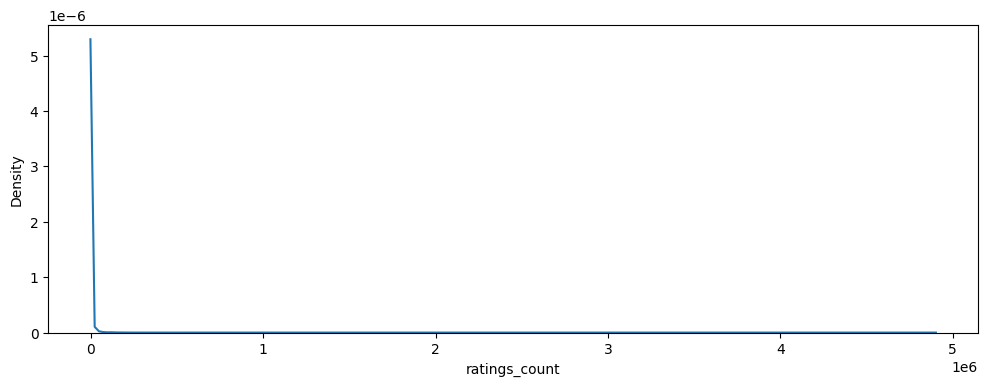

In [30]:
plt.figure(figsize=(12,4))

sns.kdeplot(data=books, x="ratings_count")
plt.show()

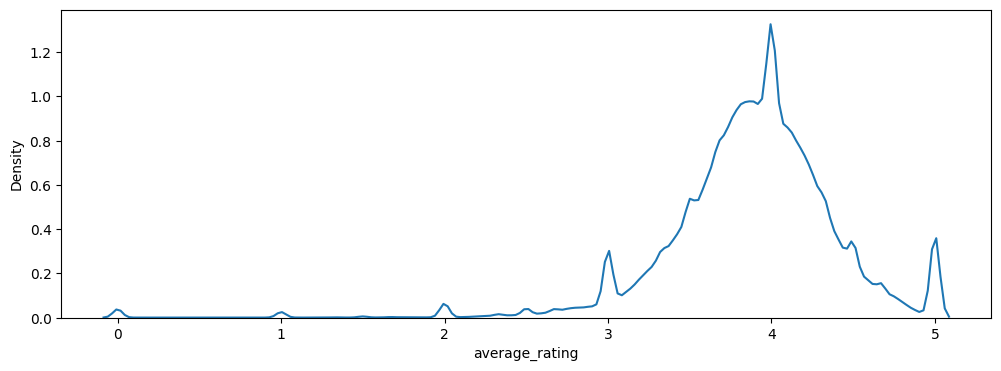

In [31]:
plt.figure(figsize=(12,4))

sns.kdeplot(data=books, x="average_rating")
plt.show()

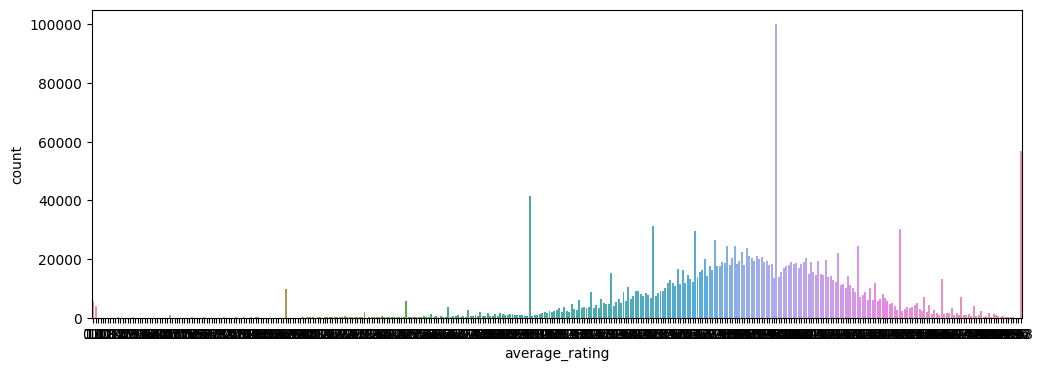

In [32]:
plt.figure(figsize=(12,4))

sns.countplot(data=books, x="average_rating")
plt.show()

In [67]:
round((10000/books.shape[0])*100,2)

0.47

In [46]:
q1 = np.percentile(books["average_rating"],25)
q3 = np.percentile(books["average_rating"],75)

print(q1, q3)

3.64 4.17


In [47]:
q1 = np.percentile(books["ratings_count"],25)
q3 = np.percentile(books["ratings_count"],75)

print(q1, q3)

6.0 82.0


In [68]:
np.percentile(books["ratings_count"],99.6)

13042.0

In [69]:
books.loc[books["average_rating"] >= 4].shape

(910212, 20)

In [70]:
books.loc[(books["average_rating"] >= 4) & (books["ratings_count"] >= 10000)].shape

(6043, 20)